<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/MEDICAMENTOS_EN_TR%C3%81MITE_DE_RENOVACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set()

In [3]:
#Import data
data = pd.read_json('https://www.datos.gov.co/resource/vgr4-gemg.json')
data.head()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,viaadministracion,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
0,209154,DICETEL® TABLETAS 100 MG,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S.,INVIMA 2008 M-011466 R1,08/06/1998,09/15/2018,En tramite renov,209154,1,1,...,ORAL,A,BROMURO DE PINAVERIO,mg,100.0,1 TABLETA RECUBIERTA,TABLETA CUBIERTA CON PELICULA,MYLAN LABORATORIES S.A.S.,FABRICANTE,IMPORTAR Y VENDER
1,209154,DICETEL® TABLETAS 100 MG,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S.,INVIMA 2008 M-011466 R1,08/06/1998,09/15/2018,En tramite renov,209154,2,1,...,ORAL,A,BROMURO DE PINAVERIO,mg,100.0,1 TABLETA RECUBIERTA,TABLETA CUBIERTA CON PELICULA,MYLAN LABORATORIES S.A.S.,FABRICANTE,IMPORTAR Y VENDER
2,209154,DICETEL® TABLETAS 100 MG,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S.,INVIMA 2008 M-011466 R1,08/06/1998,09/15/2018,En tramite renov,209154,3,1,...,ORAL,A,BROMURO DE PINAVERIO,mg,100.0,1 TABLETA RECUBIERTA,TABLETA CUBIERTA CON PELICULA,MYLAN LABORATORIES S.A.S.,FABRICANTE,IMPORTAR Y VENDER
3,209154,DICETEL® TABLETAS 100 MG,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S.,INVIMA 2008 M-011466 R1,08/06/1998,09/15/2018,En tramite renov,209154,4,1,...,ORAL,A,BROMURO DE PINAVERIO,mg,100.0,1 TABLETA RECUBIERTA,TABLETA CUBIERTA CON PELICULA,MYLAN LABORATORIES S.A.S.,FABRICANTE,IMPORTAR Y VENDER
4,209154,DICETEL® TABLETAS 100 MG,LABORATORIO FRANCO COLOMBIANO LAFRANCOL S.A.S.,INVIMA 2008 M-011466 R1,08/06/1998,09/15/2018,En tramite renov,209154,5,1,...,ORAL,A,BROMURO DE PINAVERIO,mg,100.0,1 TABLETA RECUBIERTA,TABLETA CUBIERTA CON PELICULA,MYLAN LABORATORIES S.A.S.,FABRICANTE,IMPORTAR Y VENDER


In [4]:
#Columns in the dataset
data.columns

Index(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro',
       'expedientecum', 'consecutivocum', 'cantidadcum',
       'descripcioncomercial', 'estadocum', 'fechaactivo', 'fechainactivo',
       'muestramedica', 'unidad', 'atc', 'descripcionatc', 'viaadministracion',
       'concentracion', 'principioactivo', 'unidadmedida', 'cantidad',
       'unidadreferencia', 'formafarmaceutica', 'nombrerol', 'tiporol',
       'modalidad'],
      dtype='object')

In [5]:
#Info about Dtype and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expediente            1000 non-null   int64  
 1   producto              1000 non-null   object 
 2   titular               1000 non-null   object 
 3   registrosanitario     1000 non-null   object 
 4   fechaexpedicion       1000 non-null   object 
 5   fechavencimiento      1000 non-null   object 
 6   estadoregistro        1000 non-null   object 
 7   expedientecum         1000 non-null   int64  
 8   consecutivocum        1000 non-null   int64  
 9   cantidadcum           1000 non-null   int64  
 10  descripcioncomercial  1000 non-null   object 
 11  estadocum             1000 non-null   object 
 12  fechaactivo           1000 non-null   object 
 13  fechainactivo         1000 non-null   object 
 14  muestramedica         1000 non-null   object 
 15  unidad                

In [6]:
#Null Values
data.isnull().sum()

expediente               0
producto                 0
titular                  0
registrosanitario        0
fechaexpedicion          0
fechavencimiento         0
estadoregistro           0
expedientecum            0
consecutivocum           0
cantidadcum              0
descripcioncomercial     0
estadocum                0
fechaactivo              0
fechainactivo            0
muestramedica            0
unidad                   0
atc                      0
descripcionatc           0
viaadministracion        0
concentracion            0
principioactivo          0
unidadmedida             0
cantidad                 0
unidadreferencia        19
formafarmaceutica        0
nombrerol                0
tiporol                  0
modalidad                0
dtype: int64

In [7]:
#Fill NA values
data['unidadreferencia'] = data['unidadreferencia'].fillna('Sin unidad')

In [8]:
#Verificated Null values
data.isnull().sum()

expediente              0
producto                0
titular                 0
registrosanitario       0
fechaexpedicion         0
fechavencimiento        0
estadoregistro          0
expedientecum           0
consecutivocum          0
cantidadcum             0
descripcioncomercial    0
estadocum               0
fechaactivo             0
fechainactivo           0
muestramedica           0
unidad                  0
atc                     0
descripcionatc          0
viaadministracion       0
concentracion           0
principioactivo         0
unidadmedida            0
cantidad                0
unidadreferencia        0
formafarmaceutica       0
nombrerol               0
tiporol                 0
modalidad               0
dtype: int64

In [9]:
#Group by Laboratory 
lab = data.groupby('titular')['producto'].count().sort_values()

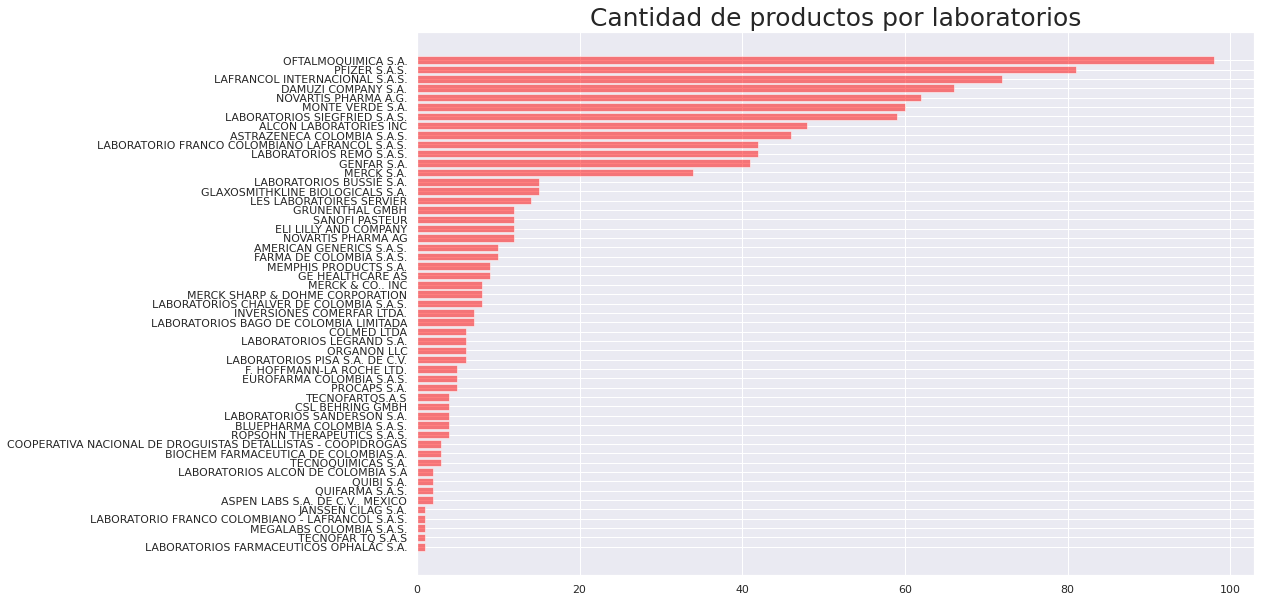

In [10]:
#Plotting Lab
sizes = lab.values
label = lab.index
plt.figure(figsize=(15,10))
plt.barh(width=sizes, y=label, color='red', alpha=0.5) 
plt.title('Cantidad de productos por laboratorios', fontsize=25)
plt.show()

In [11]:
#Group by Laboratory only 10 largest
lab2 = data.groupby('titular')['producto'].count().sort_values().nlargest(10)

Text(0.5, 1.0, '10 Laboratorios con mayor presencia en Colombia')

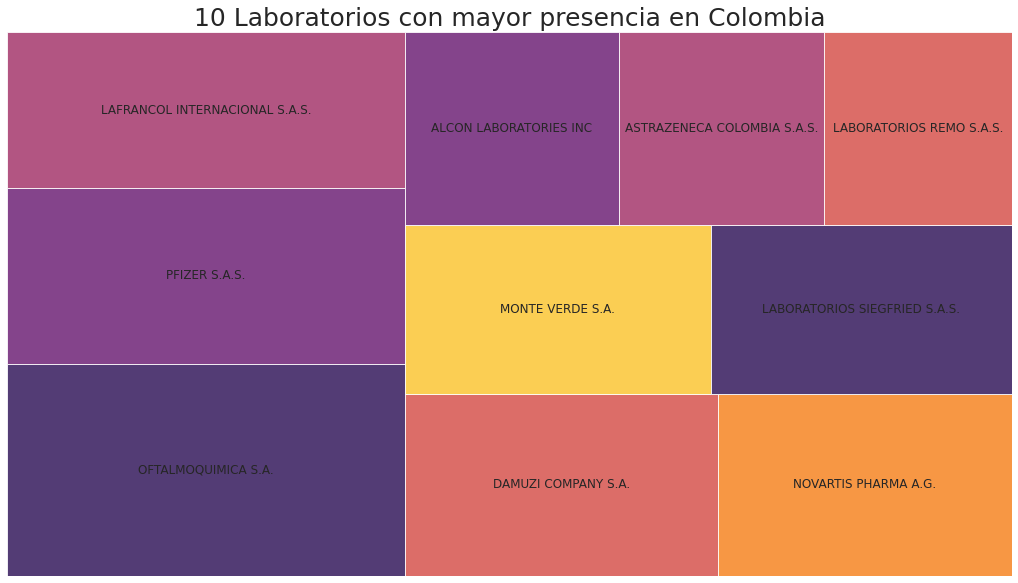

In [12]:
#Plotting Tree Map of lab2
sizes = lab2.values
label = lab2.index
plt.figure(figsize=(18,10))
squarify.plot(sizes=sizes, label=label, color=sns.color_palette("inferno"), alpha=0.8)
plt.axis('off')
plt.title('10 Laboratorios con mayor presencia en Colombia', fontsize=25)


In [38]:
#Group by via de administración 
pie = data.groupby('viaadministracion')['consecutivocum'].mean().sort_values()
print(pie)


viaadministracion
VAGINAL              1.000000
INTRAMUSCULAR        1.918919
INTRAVENOSA          2.238095
PARENTERAL           2.375000
INTRA-ARTERIAL       2.500000
INTRATECAL           2.500000
CONJUNTIVAL          2.750000
BUCAL                3.333333
SUBCUTANEA           3.500000
INTRAOCULAR          3.833333
TOPICA (EXTERNA)     4.718750
ORAL                12.000000
Name: consecutivocum, dtype: float64


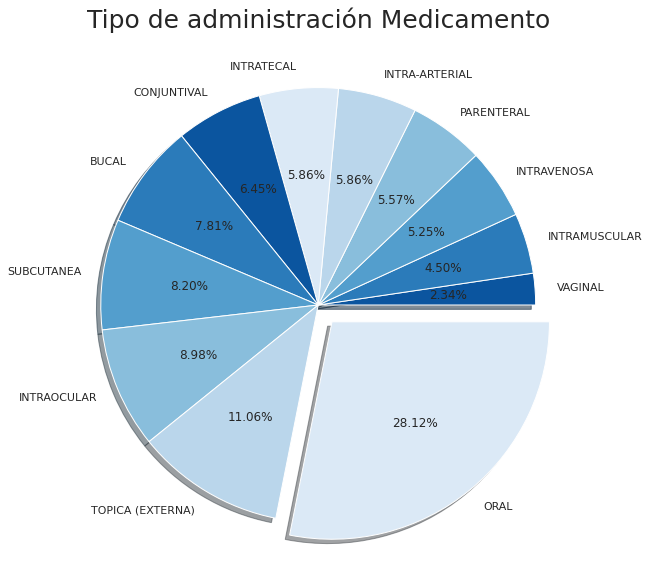

In [54]:
#Pie chart 
label = pie.index
plt.figure(figsize=(25,10))
explode = [0,0,0,0,0,0,0,0,0,0,0,0.1]
plt.pie(pie.values, labels=label, shadow=True, explode=explode, autopct='%1.2f%%', colors=sns.color_palette('Blues_r') )
plt.title('Tipo de administración Medicamento', fontsize=25)
plt.show()

In [55]:
#Converted column 'fechaexpedicion' to datetime
data['fechaexpedicion'] = pd.to_datetime(data['fechaexpedicion'], format='%m/%d/%Y') 

In [68]:
print(np.dtype(data['fechaexpedicion']))

datetime64[ns]


In [79]:
#Plotting fecha de expedición de los medicamentos

import plotly.express as px

figure = px.scatter(data,x='fechaexpedicion', y='producto', title='Fecha de expedición')
figure.show()

In [80]:
print(data.cantidad.describe())

count    1000.000000
mean      161.659813
std       415.082073
min         0.025000
25%         8.000000
50%        30.000000
75%       160.000000
max      5000.000000
Name: cantidad, dtype: float64


In [82]:
data.principioactivo.unique()

array(['BROMURO DE PINAVERIO', 'DEXTROSA MONOHIDRATO', 'CLORURO DE SODIO',
       'ACIDO RETINOICO (TRETINOINA)',
       'VITAMINA A (PROVENIENTE DE ACEITE DE HIGADO DE BACALAO 127.5 UI.Y VITAMINA APALMITATO 4872.7 UI. )',
       'VITAMINA D3(PROVENIENTEDEACEITE DE HIGADO DE BACALAO12.75 U.I.Y VITAMINA D3 387.3 U.I.).',
       'CLORHIDRATO DE ONDANSETRON DIHIDRATO 10.0 MG ( EQUIVALENTE A ONDANSETRON BASE)',
       'METRONIDAZOL', 'CLORURO DE MAGNESIO HAXAHIDRATADO',
       'CLORURO DE POTASIO', 'CLORURO DE CALCIO DIHIDRATADO',
       'CITRATO DE SODIO DIHIDRATADO', 'ACETATO DE SODIO TRIHIDRATADO',
       'PODOFILINA HEXANDRUM', 'ACIDO RETINOICO', 'LORATADINA',
       'LAMIVUDINA', 'SIMVASTATINA', 'FINASTERIDA',
       'METILERGOMETRINA MALEATO',
       'BETAMETASONA 17-VALERATO EQUIVALENTE A BETAMETASONA.',
       'DICLOXACILINA SODICA 5.410 GEQUIVALENTEA DICLOXACILINA BASE',
       'CETIRIZINA DICLORHIDRATO', 'CLORURO DE MAGNESIO HEXAHIDRATADO',
       'ATENOLOL',
       'SILDENAFILO 